# **Review Classifier**

Program ini berfungsi untuk membedakan antara review baik dengan review buruk berdasarkan suatu teks berbahasa inggris

# **Get Data**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/test.csv',
                 names=["label", "summary", "text"])

df.dropna() # cek data

,label,summary,text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
...,...,...,...
399995,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399996,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399997,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399998,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


# **Data Preproccesing**

encoding data & mengurangi data hingga 12000

In [ ]:
category = pd.get_dummies(df.label)
df_new = pd.concat([df, category], axis=1)[:12200] # data sampai 12200 saja
df_new

,label,summary,text,1,2
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...,0,1
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,0,1
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,1,0
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,0,1
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,0,1
...,...,...,...,...,...
12195,1,Not good at all,"If Nora Roberts wrote this book herself, I wou...",1,0
12196,2,The show themselves once again!,"Ahh Kraftwerk, probably one of the most elusiv...",0,1
12197,1,How Can She Teach Us?.....,As an author trying to get us to open our mind...,1,0
12198,2,worx battery as advertised,This battery works as advertised. Although I w...,0,1


menghilangkan url

In [ ]:
import re 
import string

def remove_url(text):
  url = re.compile(r"https?://\S+|www\.\S+")
  return url.sub(r"", text)

df_new['text'] = df_new.text.map(remove_url)

df_new

,label,summary,text,1,2
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...,0,1
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,0,1
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,1,0
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,0,1
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,0,1
...,...,...,...,...,...
12195,1,Not good at all,"If Nora Roberts wrote this book herself, I wou...",1,0
12196,2,The show themselves once again!,"Ahh Kraftwerk, probably one of the most elusiv...",0,1
12197,1,How Can She Teach Us?.....,As an author trying to get us to open our mind...,1,0
12198,2,worx battery as advertised,This battery works as advertised. Although I w...,0,1


menghilangkan punctuation

In [ ]:
def remove_punctuation(text):
  translator = str.maketrans("", "", string.punctuation)
  return text.translate(translator)

df_new['text'] = df_new.text.map(remove_punctuation)

df_new

,label,summary,text,1,2
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...,0,1
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,0,1
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,1,0
3,2,"works fine, but Maha Energy is better",Check out Maha Energys website Their Powerex M...,0,1
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,0,1
...,...,...,...,...,...
12195,1,Not good at all,If Nora Roberts wrote this book herself I woul...,1,0
12196,2,The show themselves once again!,Ahh Kraftwerk probably one of the most elusive...,0,1
12197,1,How Can She Teach Us?.....,As an author trying to get us to open our mind...,1,0
12198,2,worx battery as advertised,This battery works as advertised Although I wi...,0,1


menghilangkan stopword

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def remove_stopwords(text):
  filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
  return " ".join(filtered_words)

df_new['text'] = df_new.text.map(remove_stopwords)

df_new

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,summary,text,1,2
0,2,Great CD,lovely pat one great voices generation listene...,0,1
1,2,One of the best game music soundtracks - for a...,despite fact played small portion game music h...,0,1
2,1,Batteries died within a year ...,bought charger jul 2003 worked ok design nice ...,1,0
3,2,"works fine, but Maha Energy is better",check maha energys website powerex mhc204f cha...,0,1
4,2,Great for the non-audiophile,reviewed quite bit combo players hesitant due ...,0,1
...,...,...,...,...,...
12195,1,Not good at all,nora roberts wrote book would much surprised d...,1,0
12196,2,The show themselves once again!,ahh kraftwerk probably one elusive intriguing ...,0,1
12197,1,How Can She Teach Us?.....,author trying get us open minds cultures world...,1,0
12198,2,worx battery as advertised,battery works advertised although wish lasted ...,0,1


split data

In [ ]:
from sklearn.model_selection import train_test_split
kalimat = df_new['text'].values # ambil teks
y = df_new.iloc[:,3:5].values # ambil review

kalimat = kalimat.astype(str) # memastikan seluruh teks string
teks_latih, teks_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 400, oov_token='-')

tokenizer.fit_on_texts(teks_latih)
tokenizer.fit_on_texts(teks_test)

word_index = tokenizer.word_index

print(word_index)

{'-': 1, 'book': 2, 'one': 3, 'like': 4, 'movie': 5, 'good': 6, 'great': 7, 'read': 8, 'would': 9, 'time': 10, 'get': 11, 'dont': 12, 'really': 13, 'even': 14, 'first': 15, 'much': 16, 'well': 17, 'love': 18, 'story': 19, 'think': 20, 'better': 21, 'cd': 22, 'could': 23, 'many': 24, 'way': 25, 'also': 26, 'best': 27, 'film': 28, 'album': 29, 'buy': 30, 'see': 31, 'new': 32, 'know': 33, 'im': 34, 'books': 35, 'little': 36, 'never': 37, 'people': 38, 'bought': 39, 'make': 40, 'work': 41, 'music': 42, 'use': 43, 'ever': 44, 'two': 45, 'still': 46, 'bad': 47, 'made': 48, 'got': 49, 'want': 50, 'back': 51, 'dvd': 52, 'years': 53, 'find': 54, 'reading': 55, 'product': 56, 'recommend': 57, 'didnt': 58, 'found': 59, 'old': 60, 'money': 61, 'life': 62, 'ive': 63, 'say': 64, 'songs': 65, 'every': 66, 'cant': 67, 'go': 68, 'another': 69, 'thought': 70, 'used': 71, 'characters': 72, 'thing': 73, 'something': 74, 'doesnt': 75, 'lot': 76, 'put': 77, 'going': 78, '2': 79, 'quality': 80, 'makes': 81, 

sequencing

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequences_latih = tokenizer.texts_to_sequences(teks_latih)
sequences_test = tokenizer.texts_to_sequences(teks_test)

padded_latih = pad_sequences(sequences_latih, maxlen=40, padding='post', truncating='post')
padded_test = pad_sequences(sequences_test, maxlen=40, padding='post', truncating='post')

print("\nSequences = " , sequences_latih)
print("\nPadded Sequences:")
print(padded_latih.shape)


Sequences =  [[1, 26, 1, 1, 101, 5, 108, 1, 26, 1, 114, 1, 40, 106, 26, 74, 258, 25, 1, 7, 5], [5, 139, 1, 76, 112, 1, 293, 1, 252, 1, 1, 32, 1, 1, 1, 319, 1, 4, 87, 1, 1, 258, 1, 1, 5, 1, 1, 5, 90, 4, 74, 1, 193, 1, 112, 1, 1, 1, 1, 32, 1, 1, 1, 76, 1, 3, 1, 76, 1, 1, 1, 90, 1, 87, 58, 86, 181, 167, 1, 1, 24, 316, 384, 1, 89, 1, 1, 1, 1, 1, 1, 137, 36, 146, 1, 123, 112, 1, 1, 78, 1, 148, 38, 1, 1, 15, 10, 18], [8, 149, 26, 1, 143, 1, 1, 24, 93, 1, 149, 1, 1, 1, 62, 381, 1, 1, 1, 1, 1, 1, 195, 1, 1, 1, 1, 1, 1, 48, 1, 19, 9, 140, 348, 1, 1, 185, 191], [1, 82, 1, 1, 1, 1, 1, 1, 1, 131, 89, 10, 60, 116, 1, 22, 1, 1, 1, 1, 1, 1, 81, 56, 1, 1, 1, 1, 1, 1, 1, 1, 1, 15, 1, 1, 68, 1, 12, 33, 1, 1, 1, 53, 1, 1, 1, 1, 1, 1, 1], [241, 196, 38, 104, 1, 1, 221, 1, 1, 266, 249, 283, 45, 1, 1, 1, 222, 1, 1, 1, 384, 6, 1, 1, 1, 1, 1, 47, 133, 1, 1, 196, 93, 296, 173, 36, 146, 1, 47, 116, 196, 286, 235, 1, 385, 143, 1, 1, 1, 1, 1, 1, 39, 10, 1, 222, 78, 1, 124, 31, 1, 1, 1, 1, 1, 114, 1, 1, 68, 74, 3

# **Create Model**

In [ ]:
import tensorflow as tf
from keras.regularizers import l2

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(400, 32, input_length=40),
    tf.keras.layers.AveragePooling1D(2, padding='same'),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, kernel_regularizer=l2(0.01)),                    
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

fungsi callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAkurasi telah mencapai >98%!")
      self.model.stop_training = True
callbacks = myCallback()

# **Train Model**

In [ ]:
history = model.fit(padded_latih,
                    y_latih, 
                    epochs=15,
                    validation_data=(padded_test, y_test), 
                    verbose=2, 
                    callbacks=callbacks)

Epoch 1/15
305/305 - 6s - loss: 0.7302 - accuracy: 0.6748 - val_loss: 0.5243 - val_accuracy: 0.7480
Epoch 2/15
305/305 - 3s - loss: 0.4979 - accuracy: 0.7648 - val_loss: 0.4831 - val_accuracy: 0.7668
Epoch 3/15
305/305 - 3s - loss: 0.4816 - accuracy: 0.7728 - val_loss: 0.4763 - val_accuracy: 0.7738
Epoch 4/15
305/305 - 3s - loss: 0.4734 - accuracy: 0.7733 - val_loss: 0.4897 - val_accuracy: 0.7484
Epoch 5/15
305/305 - 3s - loss: 0.4634 - accuracy: 0.7784 - val_loss: 0.4859 - val_accuracy: 0.7783
Epoch 6/15
305/305 - 3s - loss: 0.4646 - accuracy: 0.7801 - val_loss: 0.4729 - val_accuracy: 0.7738
Epoch 7/15
305/305 - 3s - loss: 0.4594 - accuracy: 0.7821 - val_loss: 0.4813 - val_accuracy: 0.7656
Epoch 8/15
305/305 - 3s - loss: 0.4513 - accuracy: 0.7812 - val_loss: 0.4933 - val_accuracy: 0.7615
Epoch 9/15
305/305 - 3s - loss: 0.4498 - accuracy: 0.7836 - val_loss: 0.4784 - val_accuracy: 0.7721
Epoch 10/15
305/305 - 3s - loss: 0.4439 - accuracy: 0.7862 - val_loss: 0.4860 - val_accuracy: 0.7635

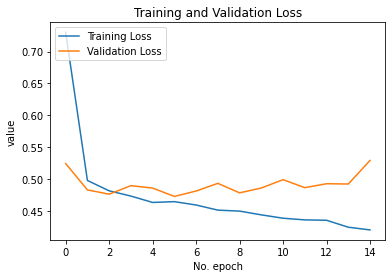

In [ ]:
from matplotlib import pyplot as plt

# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


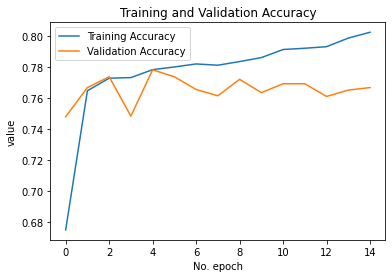

In [ ]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# **Test menggunakan sebuah teks**


In [ ]:
text = ["reviewed quite bit combo players hesitant due"]
sequences_coba = tokenizer.texts_to_sequences(text)
padded_coba = pad_sequences(sequences_coba, maxlen=40, padding='post', truncating='post')

pred = model.predict_classes(padded_coba)
print(pred)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1]
